#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

1) Numeric data : We can use summary statistics such as mean, median, standard deviation. We can also use plots for detailed exploration.

2) categorical data : frequency table.

3) relationship between categorical and numeric : I didn't really get the question but if its group wise we can do mean median per category.

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

n = 1000
categories = [f"C_{i}" for i in range(1, 11)]

df = pd.DataFrame({
    "Category": np.random.choice(categories, n),
    "Num1": np.random.normal(loc=50, scale=10, size=n),
    "Num2": np.random.normal(loc=100, scale=20, size=n)
})

print(df["Category"].value_counts())  
print(df.head())

Category
C_10    120
C_4     108
C_2     101
C_8      99
C_5      98
C_1      98
C_3      97
C_6      96
C_9      93
C_7      90
Name: count, dtype: int64
  Category       Num1        Num2
0      C_2  47.294112  114.863569
1      C_3  49.500714  123.566907
2      C_9  42.039850  100.398016
3      C_9  46.954651   99.854125
4      C_3  40.143052  111.248472


              Num1         Num2
count  1000.000000  1000.000000
mean     50.146504    99.487422
std      10.007730    19.460889
min      18.663679    36.929783
25%      43.512021    86.741759
50%      50.383341    99.371228
75%      56.444150   112.129381
max      81.574649   160.133608


(array([  3.,   5.,   7.,  16.,  29.,  39.,  74.,  85., 111., 116., 143.,
        120.,  85.,  69.,  38.,  28.,  17.,   8.,   2.,   5.]),
 array([18.66367877, 21.80922729, 24.95477582, 28.10032434, 31.24587287,
        34.39142139, 37.53696992, 40.68251845, 43.82806697, 46.9736155 ,
        50.11916402, 53.26471255, 56.41026107, 59.5558096 , 62.70135813,
        65.84690665, 68.99245518, 72.1380037 , 75.28355223, 78.42910076,
        81.57464928]),
 <BarContainer object of 20 artists>)

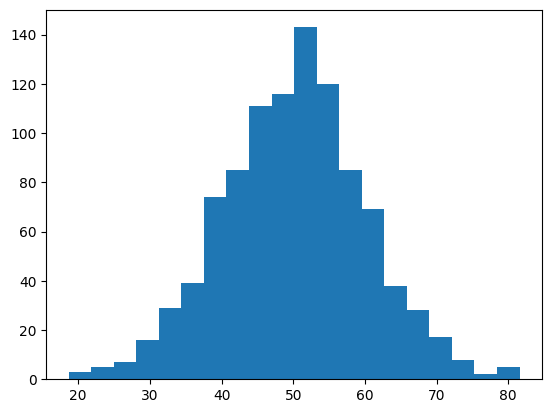

In [ ]:
print(df[["Num1", "Num2"]].describe())

##for histogram exploration 

plt.hist(df["Num1"],bins=20)


In [12]:
frequency_table = df['Category'].value_counts()

print("\nFrequency Table:\n", freq_table)



Frequency Table:
 Category
C_10    120
C_4     108
C_2     101
C_8      99
C_5      98
C_1      98
C_3      97
C_6      96
C_9      93
C_7      90
Name: count, dtype: int64


In [14]:
group_sum = df.groupby('Category')[['Num1','Num2']].agg(['mean','median','std'])
print("\nGroup-wise Summary:\n", group_sum)



Group-wise Summary:
                Num1                              Num2                       
               mean     median        std        mean      median        std
Category                                                                    
C_1       49.732913  50.921392  10.521022   96.377880   96.550478  17.713458
C_10      50.361178  51.559213  10.545431   97.840709   98.264282  19.086114
C_2       51.015037  51.122672  11.135331   99.596751  100.396573  20.917040
C_3       50.699107  49.663875   9.246972   99.924004  104.810563  21.207420
C_4       49.722786  50.233633   9.747705  102.295261  103.431312  18.425155
C_5       49.677961  49.814628  10.806359   98.918913   98.519864  20.241085
C_6       50.361968  51.332411  10.040848   98.658420   99.196577  21.708285
C_7       49.767163  49.783408   9.992108   99.618239   98.518910  17.417433
C_8       49.643762  50.019598   9.191773  101.618922   98.729756  18.707506
C_9       50.451371  50.490807   8.733788  100.113334 

#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [17]:
n = 1000
categories = [f"C_{i}" for i in range(1, 6)]

df = pd.DataFrame({
    "Category": np.random.choice(categories, n),
    "Num11": np.random.normal(loc=50, scale=10, size=n),
    "Num22": np.random.normal(loc=100, scale=20, size=n),
    "Num32": np.random.normal(loc=45, scale=30, size=n),
    "Num42": np.random.normal(loc=70, scale=40, size=n),
    
})
df['Target'] = df['Num11'] > 50
for col in df.columns:
    if col != 'Target':
        df.loc[df.sample(frac=0.05).index, col] = np.nan


print(df["Category"].value_counts())  
print(df.head())

Category
C_1    202
C_3    194
C_2    191
C_4    184
C_5    179
Name: count, dtype: int64
  Category      Num11       Num22      Num32      Num42  Target
0      C_1  61.646580   85.388734  20.782171  -2.512948    True
1      C_3  49.588697  102.091434  30.395107  65.432600   False
2      C_1  46.731854   82.501431  86.493824  37.439447   False
3      C_4  38.829671         NaN  76.457553  62.403118   False
4      C_1  66.634706  106.062964  32.325104  81.943104    True


In [ ]:
# Your code here


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [ ]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

data = pd.DataFrame({
    "Category": np.random.choice(categories, n),
    "Num11": np.random.normal(loc=50, scale=10, size=n),
    "Num22": np.random.normal(loc=100, scale=20, size=n),
    "Num32": np.random.normal(loc=45, scale=30, size=n),
    "Num42": np.random.normal(loc=70, scale=40, size=n),
    
})

df = pd.DataFrame(data)

df['Target'] = df['Num11'] > 50
for col in df.columns:
    if col != 'Target':
        df.loc[df.sample(frac=0.05).index, col] = np.nan



def run_classifier(df, classifier):
    # Separate features/target, using the correct column name 'Target0'
    y = df["Target"].astype(int)
    X = df.drop(columns=["Target"])

    numeric_features = ['Num11', 'Num22', 'Num32', 'Num42']
    categorical_features = ['Category']


    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])


    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

 
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

   
    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)

scores = run_classifier(df, LogisticRegression(random_state=42))

print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

F1 (5-fold): mean=0.963, std=0.010
Fold scores: [0.95  0.96  0.98  0.966 0.958]


Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [62]:
run_classifier(df, RandomForestClassifier(random_state=42))

array([0.97087379, 0.97512438, 0.97512438, 0.97536946, 0.97087379])

Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

I would suggest the second model worked better which was the randomforestclassifier, as the mean of the logistic regression is 0.963 and for randomforest its 0.97 which is sligthly higher so it was a better model. 